In [2]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math 
import scipy.io as sio
import scipy.io.wavfile as wavefile 
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
import wave
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

In [3]:
#Load data
music            = pd.read_table('music.txt',delim_whitespace=True,header=None)
corrupted_speech = pd.read_table('corrupted_speech.txt',delim_whitespace=True,header=None)
x= music.values                       #Input to filter = music
x=x.T
d= corrupted_speech.values            #Desired output = corrupted speech
d=d.T
N = music.size
print(N)
print(d.shape)
sc=StandardScaler()
x=sc.fit_transform(x)
d=sc.fit_transform(d)

280223
(280223, 1)


In [16]:
mu = 0.2                        #declaring feedback parameter
step_size=0.0001                #declaring step size
M = 50                          #order of the filter
print('Done')

Done


In [17]:
y=np.zeros((N,1))
e=np.zeros((N,1))
w=np.zeros((M,1))
X=np.zeros((M,N))
wmatrix=np.zeros((M,1))
j=np.zeros((M,1))
print('Done')

Done


In [18]:
for i in range(0,N):
    X[0][i] =x[i] 
print(X.shape)
for k in range(1,M):
    for i in range(0,N):
        X[k][i] = (1-mu)*X[k][max(i-1,1)] +mu*X[k-1][max(i-1,1)]
print(X.shape)        

(25, 280223)
(25, 280223)


In [19]:
#w=np.zeros((M,1))

#wmatrix=np.zeros((M,1))

In [26]:
count=0
for i in range(0,N):
    for h in range(0,M):
        j[h][0]=X[h][i]
    y[i] = w.T@j
    e[i] = d[i] - y[i]
    w = w + step_size*e[i]*j
    count+=1
    if count==10000:        #count loop can be ignored if machine is capable of handling many iterations over large datasets
        wmatrix = np.column_stack((wmatrix,w))   # Weight matrix to plot weight tracks
        count=0

erle_e = np.linalg.norm(e,ord=2)
erle_d = np.linalg.norm(d,ord=2)
mse_e = erle_e**2
mse_d = erle_d**2
erle = 10*math.log10(mse_d/mse_e)     #ToPlotERLE
print(wmatrix.shape)      
print(erle)
print('Done')    

(25, 2831)
15.467008648074527
Done


C:\Users\Koushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


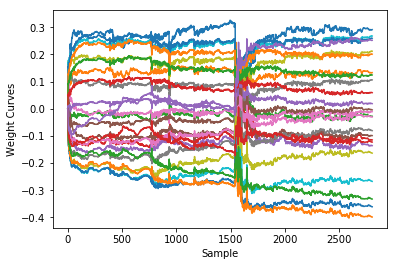

In [15]:
plt.gca()
for l in range(0,M):
    plt.plot(range(0,2803),wmatrix[l,:])
plt.xlabel('Sample')
plt.ylabel('Weight Curves')
plt.legend(loc='lower left')
plt.show()

In [34]:
#Learning curve
J = np.zeros((20,1))
for samp in range(0,20):
    cw = wmatrix[:,samp]
    error_sum = 0
    for i in range(0,N):
        for h in range(0,M):
            j[h][0]=X[h][i]
        
        y[i] = cw.T@j
        e[i] = d[i] - y[i]
        error_sum = error_sum + (e[i]**2)
    J[samp] = error_sum/(2*(N-M))
    

In [21]:
wavefile.write('recovered_speech.wav',22000,e)
wavefile.write('y.wav',22000,y)

In [11]:
#To plot ERLE for model orders ranging from M=5 to M=100
erle=[]
for M in range(5,101,5):
    y=np.zeros((N,1))
    e=np.zeros((N,1))
    w=np.zeros((M,1))
    j=np.zeros((M,1))
    X=np.zeros((M,N))
    for i in range(0,N):
        X[0][i] =x[i] 
        #print(X.shape)
    for k in range(1,M):
        for i in range(0,N):
            X[k][i] = (1-mu)*X[k][max(i-1,0)] +mu*X[k-1][max(i-1,0)]
    #print(X.shape)   
    for i in range(0,N):
        for h in range(0,M):
            j[h][0]=X[h][i]
        y[i] = w.T@j
        e[i] = d[i] - y[i]
        w = w + step_size*e[i]*j
    mse = np.linalg.norm(e,ord=2)
    mse = (mse**2)/(2*N)
    erle_d = np.linalg.norm(d,ord=2)
    MSE_d = erle_d**2/N
    erle.append(math.log10(MSE_d/mse))
    print(M, 'Loop End')
    

5 Loop End
10 Loop End
15 Loop End
20 Loop End
25 Loop End
30 Loop End
35 Loop End
40 Loop End
45 Loop End
50 Loop End
55 Loop End
60 Loop End
65 Loop End
70 Loop End
75 Loop End
80 Loop End
85 Loop End
90 Loop End
95 Loop End
100 Loop End


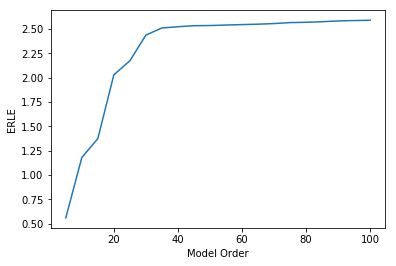

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5,101,5),erle)
ax.set_xlabel('Model Order')
ax.set_ylabel('ERLE')

In [24]:
J = np.zeros((1000,1))
for samp in range(0,1000):             #To plot learning curve
    cw = wmatrix[:,samp]               #Take limited samples if system can't handle many iterations 
    error_sum = 0
    for i in range(M,N-1):                 
        a = np.array(x[i-M:i:1])
        y[i] = cw.T@a
        e[i] = d[i] - y[i]
        error_sum = error_sum + (e[i]**2)
    J[samp] = error_sum/(2*(N-M))

KeyboardInterrupt: 

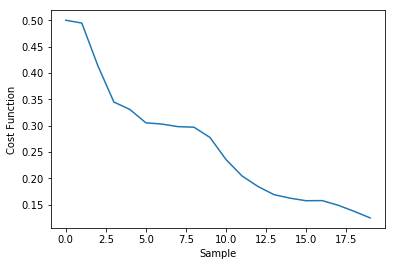

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,len(J)),J)
ax.set_xlabel('Sample')
ax.set_ylabel('Cost Function')